In [120]:
from pathlib import Path
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
import pickle
import os, sys

In [2]:
WD = Path('.').resolve().parent
el2 = next(WD.rglob('*set-core.parquet'))
df = pd.read_parquet(el2)


In [3]:
df.columns, df.__sizeof__()

(Index(['unique_id', 'dataset', 'name', 'protein_sequence', 'ligand_sequence',
        'mutation', 'effect', 'effect_type', 'protein_structure',
        'provean_score', 'foldx_score', 'elaspic_score'],
       dtype='object'),
 2245118234)

In [4]:
df = df.drop(columns='protein_structure')
df.__sizeof__()

17422668

In [141]:
df.loc[0]

unique_id                                                  3629188840
dataset                                                       ab_bind
name                                                   pdb1ffw.entA_0
protein_sequence    ADKELKFLVVDDFSTMRRIVRNLLKELGFNNVEEAEDGVDALNKLQ...
ligand_sequence                                                  None
mutation            [A89V, D12K, E116K, E92K, F110V, T111I, T86I, ...
effect              [0.09, 0.05, 0.71, 0.82, 1.26, 0.56, -0.32, 1....
effect_type                                                       ΔΔG
provean_score       [-3.876, -6.809, -1.206, -3.911, -6.873, -5.70...
foldx_score         [0.3274600000000003, -1.5615899999999998, -0.1...
elaspic_score       [0.31081372132730123, 0.1103312988873999, 0.10...
Name: 0, dtype: object

In [142]:
df.effect_type.unique()

array(['ΔΔG', 'Deleteriousness score', 'Deleteriousness class'],
      dtype=object)

In [143]:
df.loc[df.effect_type != 'ΔΔG'].head(2)

,unique_id,dataset,name,protein_sequence,ligand_sequence,mutation,effect,effect_type,provean_score,foldx_score,elaspic_score
33,1606502458,cagi4_sumo_ligase,P63279.1:158,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...,None,"[A10G, A129V, A131S, A150T, A150W, A152D, A152...","[0.545178577564802, -0.106306006463229, 0.9718...",Deleteriousness score,"[-2.7, -3.209, -2.16, -2.287, -3.9, -4.788, -3...","[1.1613000000000007, 8.175, -0.331400000000002...","[0.988251, 1.34671, 0.196791, 0.2388, 0.206708..."
34,1568123232,clinvar,P30153.2:589,AAADGDDSLYPIAVLIDELRNEDVQLRLNSIKKLSTIALALGVERT...,None,"[A160V, P178L, R181W, V161M]","[0.0, 1.0, 1.0, 0.0]",Deleteriousness class,"[-2.498, -8.087, -7.405, -2.239]","[0.47770000000000223, 1.3896000000000015, 11.9...","[0.109294, -3.40208, 2.48624, -1.8372]"


In [144]:
df.loc[33]

unique_id                                                  1606502458
dataset                                             cagi4_sumo_ligase
name                                                     P63279.1:158
protein_sequence    MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...
ligand_sequence                                                  None
mutation            [A10G, A129V, A131S, A150T, A150W, A152D, A152...
effect              [0.545178577564802, -0.106306006463229, 0.9718...
effect_type                                     Deleteriousness score
provean_score       [-2.7, -3.209, -2.16, -2.287, -3.9, -4.788, -3...
foldx_score         [1.1613000000000007, 8.175, -0.331400000000002...
elaspic_score       [0.988251, 1.34671, 0.196791, 0.2388, 0.206708...
Name: 33, dtype: object

In [179]:
def seqrecord_generator():
    for t in df.itertuples():
        if t.effect_type != 'ΔΔG':
            continue
        yield SeqRecord(seq=Seq(t.protein_sequence),
                        id=f'{t.name}_{t.unique_id}',
                        description='')

In [180]:
with open((WD / 'fopra' / el2.name).with_suffix('.fasta'), 'w') as fasta:
    SeqIO.write(seqrecord_generator(), fasta, 'fasta')

In [147]:
entry = df.loc[0]
entry.protein_sequence, entry.mutation

('ADKELKFLVVDDFSTMRRIVRNLLKELGFNNVEEAEDGVDALNKLQAGGYGFVISDWNMPNMDGLELLKTIRADGAMSALPVLMVTAEAKKENIIAAAQAGASGYVVKPFTAATLEEKLNKIFEKLGM',
 array(['A89V', 'D12K', 'E116K', 'E92K', 'F110V', 'T111I', 'T86I', 'V107M',
        'Y105W'], dtype=object))

In [148]:
df.dataset.unique(), df.name.unique()

(array(['ab_bind', 'benedix_et_al', 'cagi4_sumo_ligase', 'clinvar',
        'cosmic', 'hiv_escape_mutations', 'humsavar', 'protherm++',
        'skempi++', 'skempiskempi', 'taipale', 'taipale_gpca',
        'taipale_ppi'], dtype=object),
 array(['pdb1ffw.entA_0', 'pdb3be1.entL_2', 'pdb3bdy.entL_1', ...,
        'P00748.373:615', 'P05543.40:415', 'P43251.58:369'], dtype=object))

In [ ]:
# How many variants exist for each entry?
num_variants = df.mutation.apply(len)
num_variants

In [150]:
num_variants.max(), num_variants.argmax(), num_variants.mean()

(1709, 15592, 17.81975415405522)

Text(0.5, 1.0, 'mean number of mutations: 17.81975415405522')

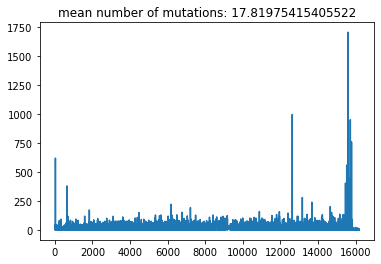

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(num_variants.values)
plt.title(f'mean number of mutations: {num_variants.values.mean()}')

<AxesSubplot:xlabel='mutation', ylabel='Count'>

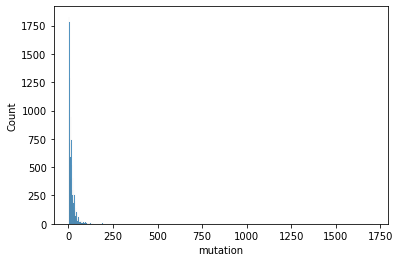

In [152]:
sns.histplot(num_variants)

In [160]:
# have a closer look at the entry that has 1709 (!) mutations
entry = df.loc[15592]
entry

unique_id                                                  2185172920
dataset                                                    protherm++
name                                                     P00720.1:164
protein_sequence    MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
ligand_sequence                                                  None
mutation            [A129M, A129M, A129M, F104A, F104A, F104A, F10...
effect              [1.9, 1.9, 1.9, 2.7, 2.7, 2.7, 0.4, 0.4, 0.4, ...
effect_type                                                       ΔΔG
provean_score       [-4.906, -4.906, -4.906, -7.865, -7.865, -7.86...
foldx_score         [4.644299999999999, 4.644299999999999, 4.64429...
elaspic_score       [1.42111, 1.55088, 1.66636, 3.06958, 3.10813, ...
Name: 15592, dtype: object

In [161]:
entry.mutation, len(entry.mutation)

(array(['A129M', 'A129M', 'A129M', ..., 'W126R', 'W138Y', 'Y25G'],
       dtype=object),
 1709)

In [172]:
ids = df.loc[df.effect_type == 'ΔΔG', 'name']
ids.value_counts()

P01051.1:70       3
P0CG48.607:684    3
P13479.1:86       3
P00698.19:147     3
P03950.25:147     3
                 ..
P03958.4:352      1
P34059.29:522     1
P00004.2:105      1
P04179.25:222     1
P55851.113:211    1
Name: name, Length: 687, dtype: int64

In [156]:
# task: generate all the variant sequences
effects = dict()
def variant_seqrecord_generator():
    for t in df.itertuples():
        if t.effect_type != 'ΔΔG':
            continue
        assert len(t.mutation) == len(t.effect), 'effect <-> mutation element count mismatch'
        _id = f'{t.name}_{t.unique_id}'
        effects[_id] = dict()
        for v, f in zip(t.mutation, t.effect):
            _from, _to, _pos = v[0], v[-1], int(v[1:-1])
            seq = Seq(t.protein_sequence).tomutable()
            assert seq[_pos - 1] == _from, 'variant_label <-> sequence mismatch'
            seq[_pos - 1] = _to
            effects[_id][v] = f
            yield SeqRecord(seq=seq, description='',
                            id=f'{t.name}_{t.unique_id}_{v}')

In [157]:
t = next(df.itertuples())
t.mutation

array(['A89V', 'D12K', 'E116K', 'E92K', 'F110V', 'T111I', 'T86I', 'V107M',
       'Y105W'], dtype=object)

In [158]:
t.protein_sequence[115]

'E'

In [159]:
len(t.effect) == len(t.mutation)


True

In [160]:
generator = variant_seqrecord_generator()
for i in range(4):
    a = next(generator)
    print(a)

ID: pdb1ffw.entA_0_3629188840_A89V
Name: <unknown name>
Number of features: 0
MutableSeq('ADKELKFLVVDDFSTMRRIVRNLLKELGFNNVEEAEDGVDALNKLQAGGYGFVI...LGM')
ID: pdb1ffw.entA_0_3629188840_D12K
Name: <unknown name>
Number of features: 0
MutableSeq('ADKELKFLVVDKFSTMRRIVRNLLKELGFNNVEEAEDGVDALNKLQAGGYGFVI...LGM')
ID: pdb1ffw.entA_0_3629188840_E116K
Name: <unknown name>
Number of features: 0
MutableSeq('ADKELKFLVVDDFSTMRRIVRNLLKELGFNNVEEAEDGVDALNKLQAGGYGFVI...LGM')
ID: pdb1ffw.entA_0_3629188840_E92K
Name: <unknown name>
Number of features: 0
MutableSeq('ADKELKFLVVDDFSTMRRIVRNLLKELGFNNVEEAEDGVDALNKLQAGGYGFVI...LGM')


In [161]:
with open(WD / 'fopra' / f'{el2.stem}_variants.fasta', 'w') as fasta:
    SeqIO.write(variant_seqrecord_generator(), fasta, 'fasta')

In [162]:
with open(WD / 'fopra' / f'{el2.stem}_variant_effects.pkl', 'wb') as pkl:
    pickle.dump(effects, pkl)

In [163]:
with open(WD / 'fopra' / f'{el2.stem}_variant_effects.pkl', 'rb') as pkl:
    affects = pickle.load(pkl)